## Sample PICARRO run

This notebook emulates the Excel workflow that was proposed by van Geldern (2012).

### Reading the raw data and producing a run summary

First of all, we've got to read the raw data from PICARRO after one analysis.
We check first whether a run line is *empty*.

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


In [2]:
import Picarro as pica
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from random import random

No empty cells. Proceeding...
<class 'pandas.core.frame.DataFrame'>


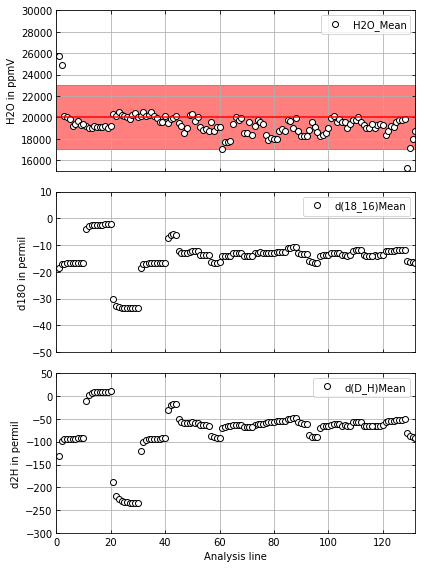

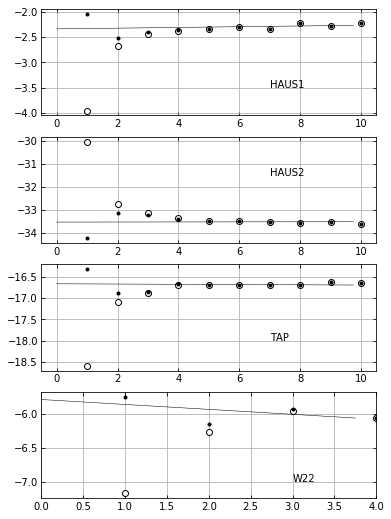

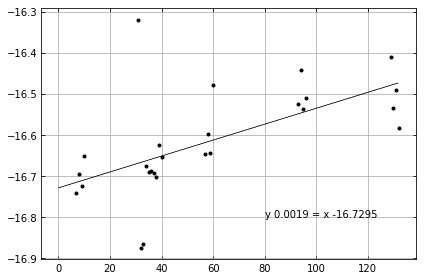

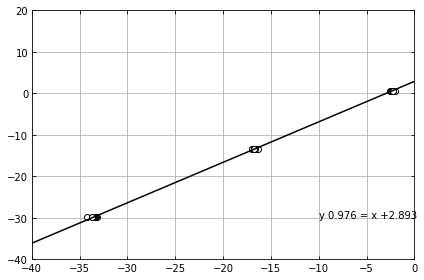

In [3]:
run,d18O,SD_coeffs = pica.initialTreatment("example_data/HKDS2009_IsoWater_20191106_083502.csv",
                                          option='Plot')

In [45]:
from scipy.optimize import differential_evolution,Bounds

In [6]:
x = np.array([SD_coeffs["mem_coeffs"][i] for i in SD_coeffs["mem_coeffs"]]) # array of variables, here the different mem coeffs

In [7]:
x1 =pica.get_initial_coeffs(0.849029498880193) 
x2 =pica.get_initial_coeffs(0.9) 

In [8]:
x1

[0.8490295,
 0.86461,
 0.8804764,
 0.896634,
 0.913088,
 0.9298441,
 0.9469076,
 0.9642842,
 0.9819797,
 1.0]

In [ ]:
def SDfromCoeffs(x):
    my_coeffs = dict([(i,j) for i,j in zip(np.arange(1,11,1),x)])
    d18O["d(18_16)mem_corrected"] = pica.computeMemCorrected(d18O,my_coeffs)
    coeffs = pica.updateSD(pica.initMemCoeffs(),d18O)
    return coeffs["combined_sd"]